In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Read in results data

In [ ]:
# create one df from the 4 results files
emo = pd.read_csv('/drive/My Drive/W266 - NLP with Deep Learning/Data/emo_results.csv')
emotion = pd.read_csv('/drive/My Drive/W266 - NLP with Deep Learning/Data/emotion_results.csv')
SNIPS = pd.read_csv('/drive/My Drive/W266 - NLP with Deep Learning/Data/SNIPS_results.csv')
ATIS = pd.read_csv('/drive/My Drive/W266 - NLP with Deep Learning/Data/ATIS_results.csv')

df = pd.concat([ATIS, SNIPS, emotion, emo], ignore_index=True)
df

,eval_loss,eval_accuracy,eval_f1,eval_precision,eval_recall,eval_runtime,eval_samples_per_second,eval_steps_per_second,dataset,training_time,training_loss,training_size
0,1.277341,0.739510,0.628770,0.546876,0.739510,20.5001,27.902,3.512,ATIS,39,1.397921,100
1,0.921175,0.739510,0.628770,0.546876,0.739510,20.5311,27.860,3.507,ATIS,78,0.825163,200
2,0.520074,0.896853,0.862340,0.836777,0.896853,20.4821,27.927,3.515,ATIS,195,0.382032,500
3,0.327234,0.933566,0.909916,0.891060,0.933566,20.4983,27.905,3.512,ATIS,393,0.183021,1000
4,0.134031,0.979021,0.975185,0.974747,0.979021,20.5996,27.768,3.495,ATIS,787,0.087008,2000
5,0.081379,0.987762,0.984665,0.983153,0.987762,20.6891,27.647,3.480,ATIS,1191,0.041321,3000
6,0.074053,0.987762,0.986371,0.986934,0.987762,20.6654,27.679,3.484,ATIS,1693,0.019936,4274
7,2.642810,0.439394,0.286963,0.253867,0.439394,2.3290,28.338,3.864,SNIPS,10,2.570977,25
8,2.528007,0.363636,0.282550,0.299242,0.363636,2.3785,27.749,3.784,SNIPS,20,2.419723,50
9,2.377988,0.469697,0.311115,0.236865,0.469697,2.3573,27.998,3.818,SNIPS,29,2.381980,75


## Plots of Performance/Results

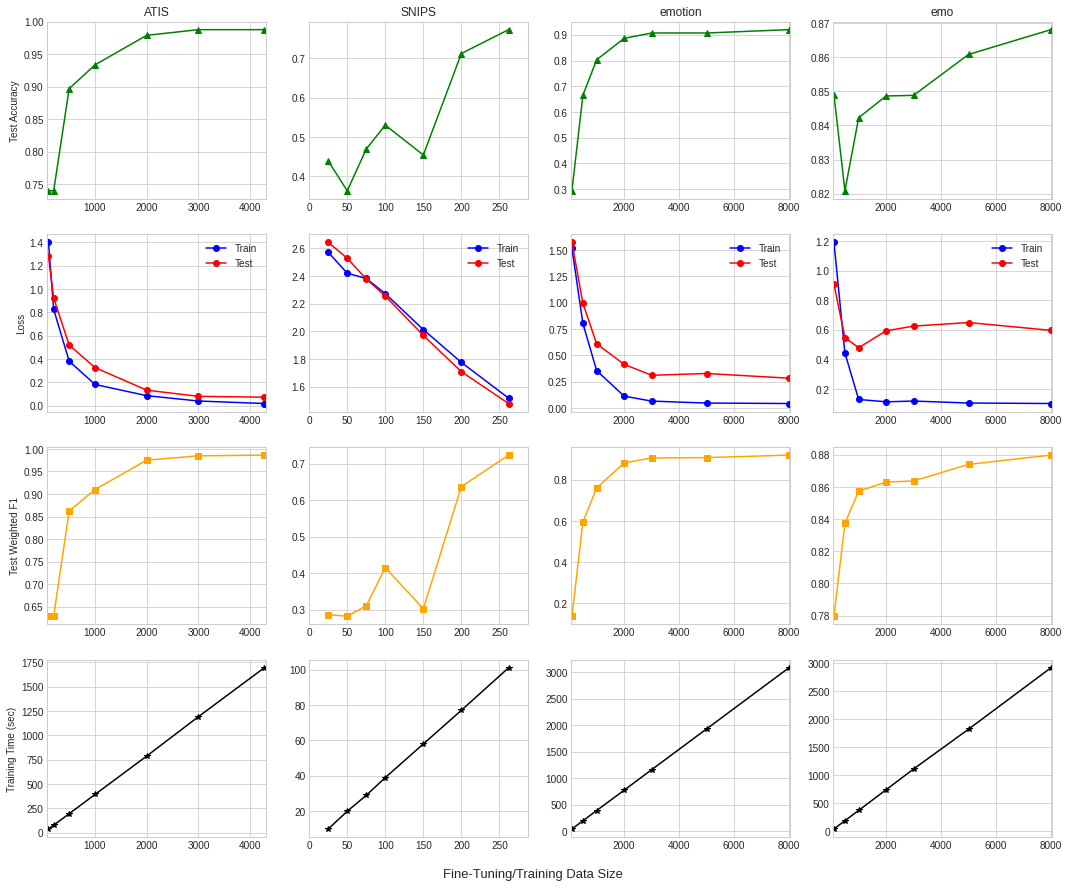

In [ ]:
# Full Table of Results and Training Times
##########################################
# list of dataset names
datasets = ['ATIS', 'SNIPS', 'emotion', 'emo']

# set plot style
plt.style.use('seaborn-whitegrid')

# create subplots
fig, axs = plt.subplots(4, 4, figsize = (18,15))
for i in range(4):
    # subset for each dataset
    df_sub = df[df['dataset'] == datasets[i]]

    # Accuracy Plot
    axs[0,i].plot(df_sub['training_size'], df_sub['eval_accuracy'], color='green', marker='^')
    axs[0,i].set_title(datasets[i])
    axs[0,i].set_xlim([np.min(df_sub['training_size'] - 25), np.max(df_sub['training_size'] + 25)])

    # Train/Eval Loss Plot
    axs[1,i].plot(df_sub['training_size'], df_sub['training_loss'], color = 'blue', marker = 'o', label='Train')
    axs[1,i].plot(df_sub['training_size'], df_sub['eval_loss'], color = 'red', marker = 'o', label='Test')
    axs[1,i].legend()
    axs[1,i].set_xlim([np.min(df_sub['training_size'] - 25), np.max(df_sub['training_size'] + 25)])

    # Weighted F1
    axs[2,i].plot(df_sub['training_size'], df_sub['eval_f1'], color='orange', marker='s')
    axs[2,i].set_xlim([np.min(df_sub['training_size'] - 25), np.max(df_sub['training_size'] + 25)])

    # Training Time
    axs[3,i].plot(df_sub['training_size'], df_sub['training_time'], color='black', marker='*')
    axs[3,i].set_xlim([np.min(df_sub['training_size'] - 25), np.max(df_sub['training_size'] + 25)])

# Label x/y axes
plt.setp(axs[0,0], ylabel='Test Accuracy')
plt.setp(axs[1,0], ylabel='Loss')
plt.setp(axs[2,0], ylabel='Test Weighted F1')
plt.setp(axs[3,0], ylabel='Training Time (sec)')
fig.text(0.5, 0.09, 'Fine-Tuning/Training Data Size', ha='center', va='center', fontsize=13)

plt.savefig('/drive/My Drive/W266 - NLP with Deep Learning/Project_Results/Full_Results_sb.png')

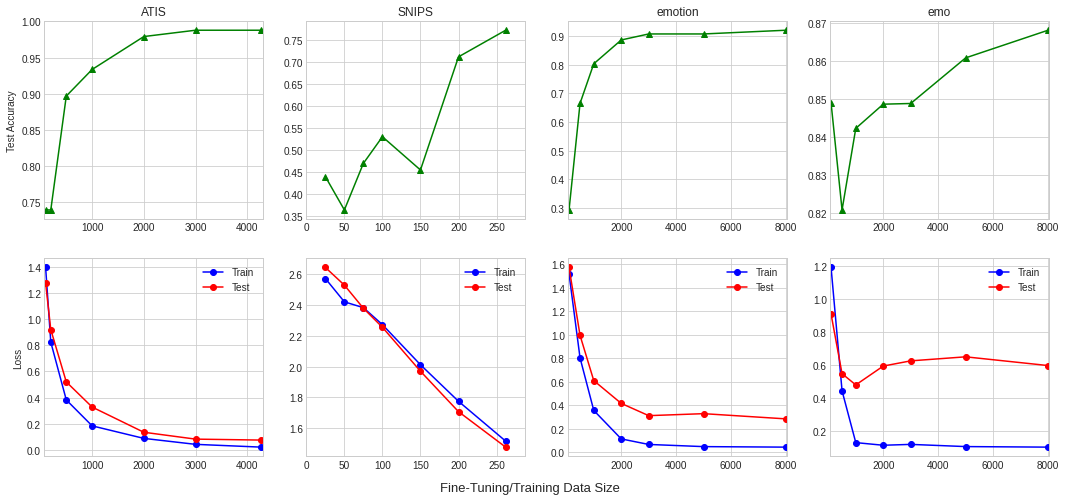

In [ ]:
# Accuracy And Loss Plots
#########################
# list of dataset names
datasets = ['ATIS', 'SNIPS', 'emotion', 'emo']

# set plot style
plt.style.use('seaborn-whitegrid')

# create subplots
fig, axs = plt.subplots(2, 4, figsize = (18,8))
for i in range(4):
    # subset for each dataset
    df_sub = df[df['dataset'] == datasets[i]]

    # Accuracy Plot
    axs[0,i].plot(df_sub['training_size'], df_sub['eval_accuracy'], color='green', marker='^')
    axs[0,i].set_title(datasets[i])
    axs[0,i].set_xlim([np.min(df_sub['training_size'] - 25), np.max(df_sub['training_size'] + 25)])

    # Train/Eval Loss Plot
    axs[1,i].plot(df_sub['training_size'], df_sub['training_loss'], color = 'blue', marker = 'o', label='Train')
    axs[1,i].plot(df_sub['training_size'], df_sub['eval_loss'], color = 'red', marker = 'o', label='Test')
    axs[1,i].legend()
    axs[1,i].set_xlim([np.min(df_sub['training_size'] - 25), np.max(df_sub['training_size'] + 25)])

# Label x/y axes
plt.setp(axs[0,0], ylabel='Test Accuracy')
plt.setp(axs[1,0], ylabel='Loss')
fig.text(0.5, 0.07, 'Fine-Tuning/Training Data Size', ha='center', va='center', fontsize=13)

plt.savefig('/drive/My Drive/W266 - NLP with Deep Learning/Project_Results/Acc_and_Loss_Results_sb.png')